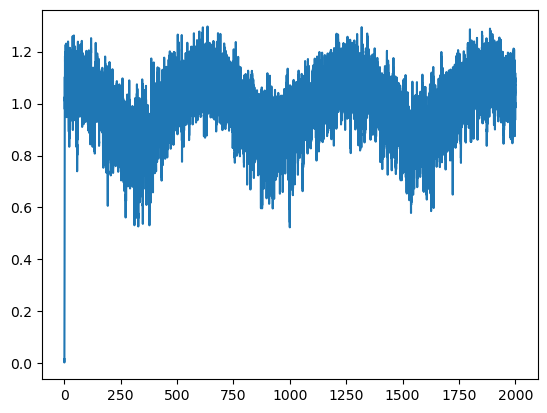

In [1]:
import numpy as np
from matplotlib import pyplot as plt



def dU_dx(x):
    return  x**3-x

def peridiodic_driving(t, A, Omega):
    return A*np.cos(Omega*t)

def gausian_noise(t, D, dt):
    return np.random.normal(0, np.sqrt(2 * D / dt))


def time_step(x, t, dt, A, Omega, D):
    x += (-dU_dx(x)+peridiodic_driving(t, A, Omega)+gausian_noise(t, D, dt))*dt
    t += dt
    return x, t

def simulate(initial_x, initial_t, A, Omega, D, dt, steps):
    x_arr = np.zeros(steps)
    t_arr = np.zeros(steps)
    x = initial_x
    t = initial_t

    for i in range(steps):
        x, t = time_step(x, t, dt, A, Omega, D)
        x_arr[i], t_arr[i] = x, t

    return x_arr, t_arr

initial_x = 0
initial_t = 0
steps = 200000
A = 0.2 #0 to 0.2 A ∝ 1/|ln(pi*sqrt(2)*Omega)|
Omega = 0.01 #10e-2 to 10e-6
D = 0.01 #0 to 0.1 
dt = 0.01


x_arr, t_arr = simulate(initial_x, initial_t, A, Omega, D, dt, steps)

plt.plot(t_arr, x_arr)
plt.show()
